# Pertemuan	6	-	Organisasi dan Analisis Dataset

Hal-hal yang dibahas pada Bab ini:
1. Pengenalan feature engineering.
2. Teknik data augmentation.
3. Metode normalisasi data.
4. Penggunaan ensemble methods.
5. Integrasi dataset dari berbagai sumber.

# 6.1. Feature Engineering: definisi, teknik, dan implementasi

Feature engineering adalah proses di mana kita menggunakan pengetahuan
domain untuk membuat fitur-fitur baru yang lebih informatif dari data mentah (raw
data) yang ada. Tujuannya adalah untuk meningkatkan kualitas data yang digunakan
dalam model machine learning, sehingga model dapat membuat prediksi yang lebih
akurat.
Teknik Feature Engineering:
1. Penggabungan Fitur (Feature Combination): Menggabungkan beberapa fitur
untuk menciptakan fitur baru yang lebih informatif. Contohnya, dalam data
geospasial, bisa digabungkan koordinat latitude dan longitude menjadi fitur
jarak atau fitur lain yang lebih bermakna.
2. Pengurangan Dimensi (Dimensionality Reduction): Mengurangi jumlah fitur
dalam dataset dengan teknik seperti Principal Component Analysis (PCA) atau
t-SNE untuk menghilangkan fitur yang kurang relevan atau redundan.
3. Penambahan Informasi (Feature Augmentation): Menambahkan informasi
tambahan ke dalam dataset, misalnya menambahkan fitur tanggal menjadi hari
kerja atau hari libur, yang dapat memberikan wawasan tambahan pada model.
4. Transformasi Fitur (Feature Transformation): Mengubah skala atau distribusi
dari fitur untuk memperbaiki kinerja model. Contoh umumnya adalah
normalisasi atau transformasi logaritmik.
5. Seleksi Fitur (Feature Selection): Memilih subset fitur yang paling penting atau
relevan untuk meningkatkan performa model. Teknik seperti chi-square,
information gain, atau recursive feature elimination (RFE) digunakan untuk
seleksi fitur.
6. Encoding Kategori (Category Encoding): Mengubah variabel kategori menjadi
bentuk yang dapat dimengerti oleh model, seperti menggunakan teknik one
hot encoding atau label encoding.

In [ ]:
# Implementasi:
# Berikut adalah contoh implementasi sederhana beberapa teknik feature engineering menggunakan Python dan scikit-learn:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Contoh dataset
data = {
    'City': ['New York', 'Los Angeles', 'Chicago', 'Boston', 'Miami'],
    'Temperature': [25, 30, 22, 18, 28],
    'Category': ['A', 'B', 'A', 'C', 'B']
}
df = pd.DataFrame(data)

# Contoh 1: Encoding kategori
encoder = OneHotEncoder()
encoded_category = encoder.fit_transform(df[['Category']])

# Contoh 2: Transformasi fitur numerik
scaler = StandardScaler()
scaled_temperature = scaler.fit_transform(df[['Temperature']])

# Contoh 3: Penggabungan fitur
df['City_Temperature'] = df['City'] + '_' + df['Temperature'].astype(str)

# Contoh 4: Pengurangan dimensi dengan PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(encoded_category.toarray())

# Contoh 5: Ekstraksi fitur teks dengan TF-IDF
# NOTE: corpus has been modified to have the same number of samples (5) as
df['Category']
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
    'This is the fifth document.'
    # Added a fifth document to match the number of samples in df['Category']
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Memisahkan fitur dan label, dan membagi dataset
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'],
test_size=0.2, random_state=42)

# Contoh menggunakan model machine learning setelah feature engineering
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.0


Dalam contoh di atas:

a. Kita mulai dengan dataset sederhana yang berisi fitur kategori, numerik, dan
teks.

b. Dilakukan encoding kategori menggunakan OneHotEncoder, transformasi
skala fitur numerik menggunakan StandardScaler, penggabungan fitur dengan
menambahkan fitur baru City_Temperature, dan pengurangan dimensi
dengan menggunakan PCA.

c. Fitur teks diekstraksi menggunakan TfidfVectorizer.

d. Setelah melakukan feature engineering, dataset dibagi menjadi data pelatihan
dan data pengujian, dan digunakan model RandomForestClassifier untuk
memprediksi kategori dari contoh data pengujian.

e. Akurasi dari model diukur menggunakan metrik accuracy.

Feature engineering adalah langkah penting dalam pengembangan model machine
learning yang dapat meningkatkan performa model dengan memanfaatkan informasi
tambahan atau lebih relevan dari dataset yang tersedia.


# 6.2 Data Augmentattion

Data augmentation adalah teknik yang digunakan untuk meningkatkan variasi
dataset dengan membuat salinan data yang dimodifikasi dari data asli. Tujuan
utamanya adalah untuk memperluas dataset yang tersedia tanpa mengumpulkan
lebih banyak data, yang dapat membantu mengurangi overfitting dan meningkatkan
generalisasi model.

Tujuan Data Augmentation

1. Meningkatkan Keanekaragaman Data: Dengan membuat variasi data yang
lebih besar, model dapat mempelajari pola yang lebih umum dan lebih baik
dalam data yang belum pernah dilihat sebelumnya.
2. Mengurangi Overfitting: Dengan menggunakan augmentasi, kita dapat
mengurangi risiko model mempelajari detail yang spesifik dari data pelatihan
yang mungkin tidak relevan untuk data baru.
3. Memperbaiki Kinerja Model: Dengan dataset yang lebih besar dan lebih
bervariasi, kita dapat meningkatkan performa model dalam tugas-tugas seperti
klasifikasi gambar atau teks.

Data Augmentation Gambar

• Rotasi: Memutar gambar dalam berbagai sudut.

• Flip: Membalikkan gambar secara horizontal atau vertikal.

• Zoom: Memperbesar atau memperkecil bagian-bagian gambar.

• Pergeseran: Memindahkan gambar ke arah horizontal atau vertikal.

• Cropping: Memotong bagian dari gambar.

Implementasi menggunakan imgaug  (Python)

imgaug adalah pustaka Python yang kuat untuk augmentasi gambar dengan berbagai
teknik. Berikut adalah contoh penggunaan imgaug untuk melakukan beberapa teknik
augmentasi gambar:

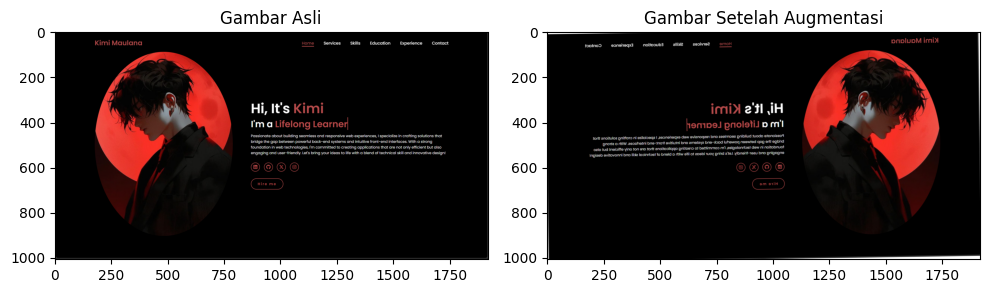

In [ ]:
import numpy as np
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt
from PIL import Image

# Contoh gambar
image = np.array(Image.open('Portfolio_Website.png'))

# Definisi augmentor
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # Flip horizontal dengan peluang 50%
    iaa.Affine(rotate=(-10, 10)),  # Rotasi gambar dalam rentang -10 sampai 10 derajat
    iaa.GaussianBlur(sigma=(0, 1.0))  # Blur Gaussian dengan sigma antara 0 dan 1.0
])

# Augmentasi gambar
augmented_image = seq(image=image)

# Tampilkan hasil augmentasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Gambar Asli')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image)
plt.title('Gambar Setelah Augmentasi')

plt.tight_layout()
plt.show()

Data Augmentation Teks

a. Pertambahan Kata (Word Insertion): Menambahkan kata-kata baru ke dalam
teks.

b. Penggantian Kata (Word Replacement): Mengganti kata-kata dengan sinonim
atau kata-kata yang serupa.

c. Pemotongan Kata (Word Truncation): Memotong atau menghapus kata-kata
dari teks.

d. Pengacakan Urutan Kata (Word Reordering): Mengacak urutan kata dalam
teks.

Implementasi menggunakan TextBlob (Python):

TextBlob adalah pustaka Python yang memudahkan analisis teks dengan
menyediakan akses mudah ke operasi linguistik. Berikut adalah contoh penggunaan
TextBlob untuk beberapa teknik augmentasi teks:


In [ ]:
from textblob import TextBlob
import random

# Contoh teks
text = "Ini adalah contoh kalimat untuk augmentasi teks."

# Objek TextBlob untuk teks
blob = TextBlob(text)

# Pertambahan kata
augmented_text = blob.words + ['baru', 'kata']

# Penggantian kata acak
for i in range(len(blob.words)):
    if random.random() < 0.3:  # Probabilitas 30% untuk penggantian kata
        augmented_text[i] = 'kata_baru'

# Konversi kembali ke teks
augmented_text = ' '.join(augmented_text)

print("Teks Asli:", text)
print("Teks Setelah Augmentasi:", augmented_text)


# Normalisasi Data

Normalisasi data adalah proses mengubah nilai-nilai dalam dataset sehingga
memiliki skala yang seragam. Tujuannya adalah untuk menghindari dominasi oleh
fitur-fitur dengan skala besar dan memastikan setiap fitur memiliki kontribusi yang
seimbang terhadap hasil akhir model.
Implementasi menggunakan Scikit-Learn

In [29]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Contoh dataset
data = np.array([[1.0, 2.0, 3.0],
                 [4.0, 5.0, 6.0],
                 [7.0, 8.0, 9.0]])

# 1. Min-Max Scaling (Normalization)
scaler_minmax = MinMaxScaler()
data_minmax_scaled = scaler_minmax.fit_transform(data)

print("Min-Max Scaled Data:")
print(data_minmax_scaled)
print()

# 2. Z-Score Normalization (Standardization)
scaler_standard = StandardScaler()
data_standard_scaled = scaler_standard.fit_transform(data)

print("Z-Score Standardized Data:")
print(data_standard_scaled)

Min-Max Scaled Data:
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]

Z-Score Standardized Data:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


Dalam contoh di atas, data_minmax_scaled dan data_standard_scaled adalah
hasil dari normalisasi data menggunakan Min-Max Scaling dan Z-Score
Normalization, masing-masing. Hasilnya dapat digunakan sebagai input untuk model
machine learning untuk memastikan setiap fitur memiliki pengaruh yang setara
terhadap hasil akhir model. Dengan menggunakan teknik normalisasi, kita dapat
mempersiapkan data dengan cara yang optimal untuk berbagai jenis model machine
learning, meningkatkan interpretabilitas, konvergensi, dan performa model secara
keseluruhan.

# Ensemble Methods

Ensemble Methods adalah teknik dalam machine learning di mana beberapa
model (yang disebut "learners" atau "base models") digabungkan bersama untuk
meningkatkan kinerja prediksi secara keseluruhan. Ide dasarnya adalah bahwa
gabungan dari beberapa model yang berbeda sering kali lebih baik daripada model
individu yang digunakan secara terpisah.
Jenis Ensemble Methods
1. Bagging (Bootstrap Aggregating): Menggunakan beberapa dataset bootstrap
(sampel acak dengan penggantian dari dataset pelatihan) untuk melatih
beberapa model serentak. Contoh: Random Forest.
2. Boosting: Mengurangi bias model dengan memusatkan perhatian pada data
yang salah diperkirakan oleh model sebelumnya. Contoh: AdaBoost, Gradient
Boosting Machines (GBM), XGBoost, LightGBM
3. Stacking (Stacked Generalization): Menggabungkan output dari beberapa
model berbeda sebagai input untuk model meta-learner (model yang lebih
tinggi). Contoh: Menggunakan hasil prediksi dari SVM, Random Forest, dan
Neural Network sebagai input untuk model klasifikasi logistic regression.
Implementasi Ensemble Methods
Berikut adalah contoh implementasi ensemble methods menggunakan Python dengan
scikit-learn:

In [30]:
# Contoh dengan Random Forest (Bagging):
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Contoh dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Inisialisasi dan latih model Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
# Prediksi menggunakan model yang sudah dilatih
y_pred = clf.predict(X_test)
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [31]:
# Contoh dengan AdaBoost (Boosting)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Contoh dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Inisialisasi dan latih model AdaBoost
clf = AdaBoostClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)

# Prediksi menggunakan model yang sudah dilatih
y_pred = clf.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.875
